###### Практическая работа 7. Алгоритмы программирования деревьев решений и визуализация модели дерева принятия решений


Изучение алгоритмов построения деревьев решений. Ознакомьтесь с
основными алгоритмами построения деревьев решений, такими как ID3, C4.5,
CART.

Программирование деревьев решений в Python. Напишите код для
построения дерева решений на основе выбранного алгоритма. Воспользуйтесь
библиотекой scikit-learn.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Инициализация модели дерева решений
clf = DecisionTreeClassifier()

# Обучение модели на обучающем наборе данных
clf.fit(X_train, y_train)

DecisionTreeClassifier()

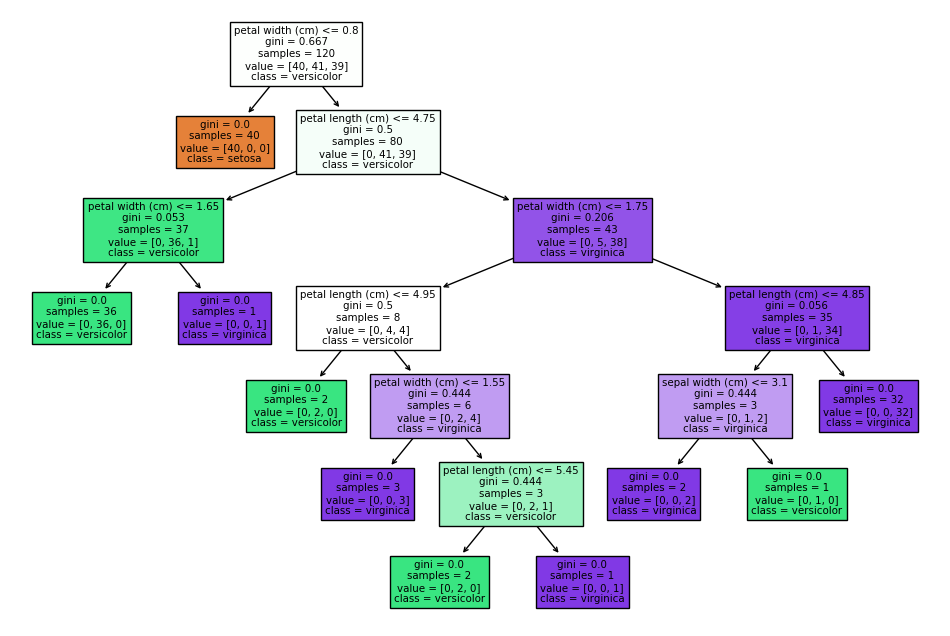

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Визуализация модели дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names,
class_names=iris.target_names)
plt.show()

In [4]:
from sklearn.metrics import accuracy_score
# Оценка производительности модели на тестовом наборе данных
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

1 строка это вопросы, допустим, мы играем в игру "Кто я?" и нам нужно угадать какого персонажа или человека нам загадали. Мы видим список всех людей и их параметры, нам нужно задать вопросы чтобы угадать нашего персонажа или человека. В нашем примере после 1 вопроса, а "petal_width" меньше или равно 0.8?
мы сразу угадываем класс setosa, с двумя остальными классами мы не можем точно сказать, т.к желтый цвет перекрывает зеленый. 2 gini - используется для измерения того, насколько чисто разделены различные классы в узле дерева. Чем ниже значение Gini, тем более "чистым" считается узел, что означает более точное разделение классов. 3 samples - показывает количество наших данных входящих под условие. value - показывает изначально количество всех данных внутри массива, и постепенное прогнозирование для разных классов. class - признак

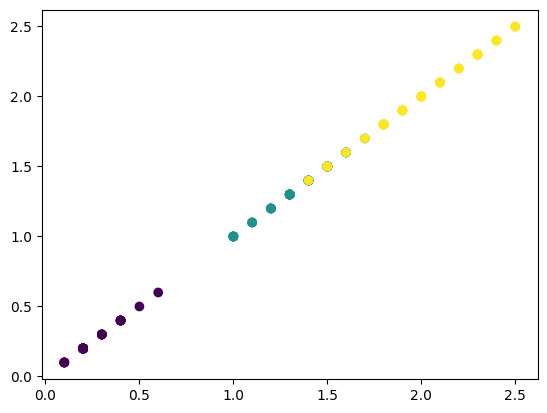

In [29]:
plt.scatter(X[:, 3], X[:, 3],c = y)
plt.show()

1. Исследуйте влияние различных параметров модели дерева решений
(глубина дерева, критерий разделения и т.д.) на её производительность.
2. Реализуйте сравнительный анализ различных алгоритмов построения
деревьев решений на различных наборах данных.

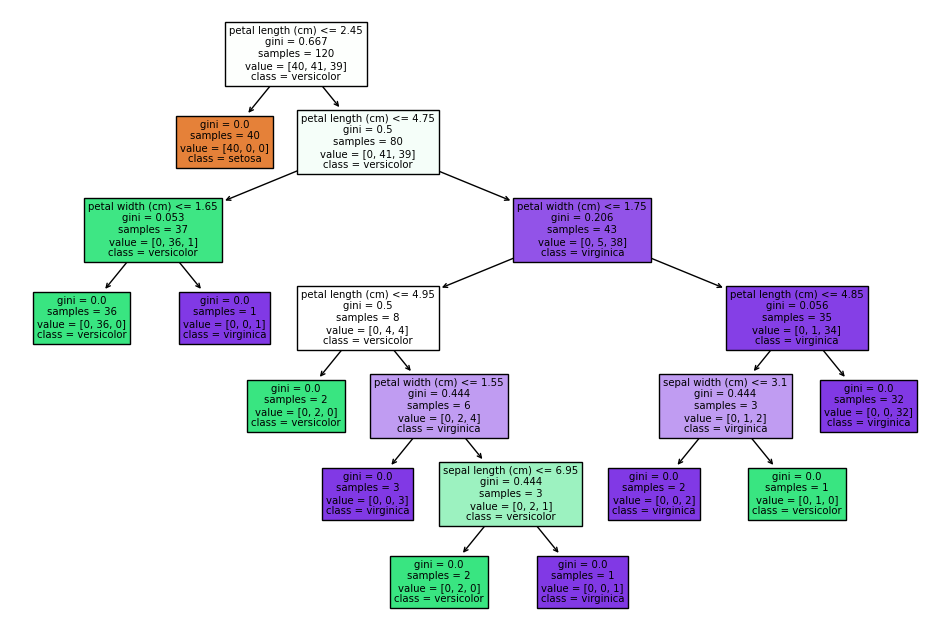

DecisionTreeClassifier() 1.0


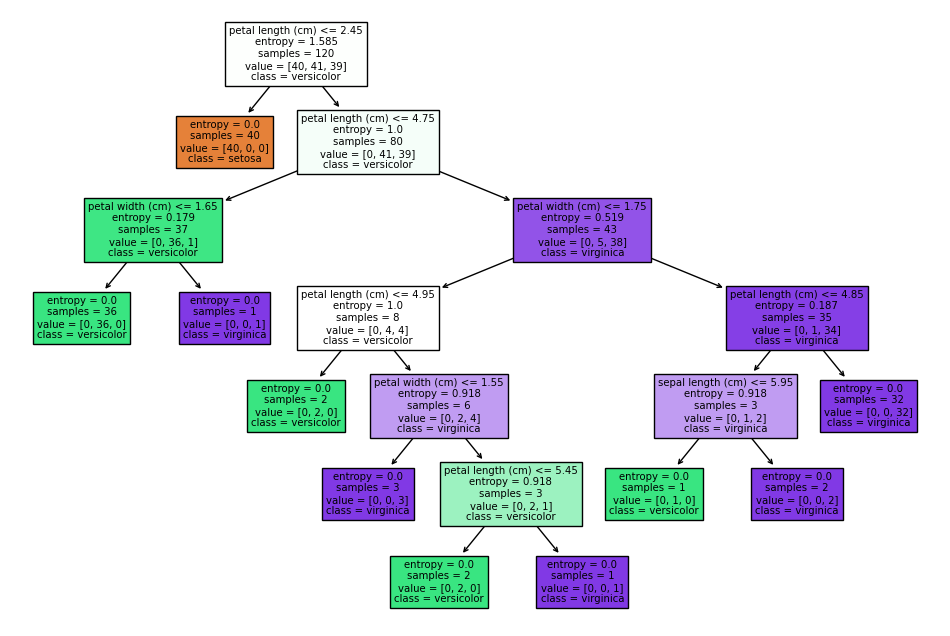

DecisionTreeClassifier(criterion='entropy') 1.0


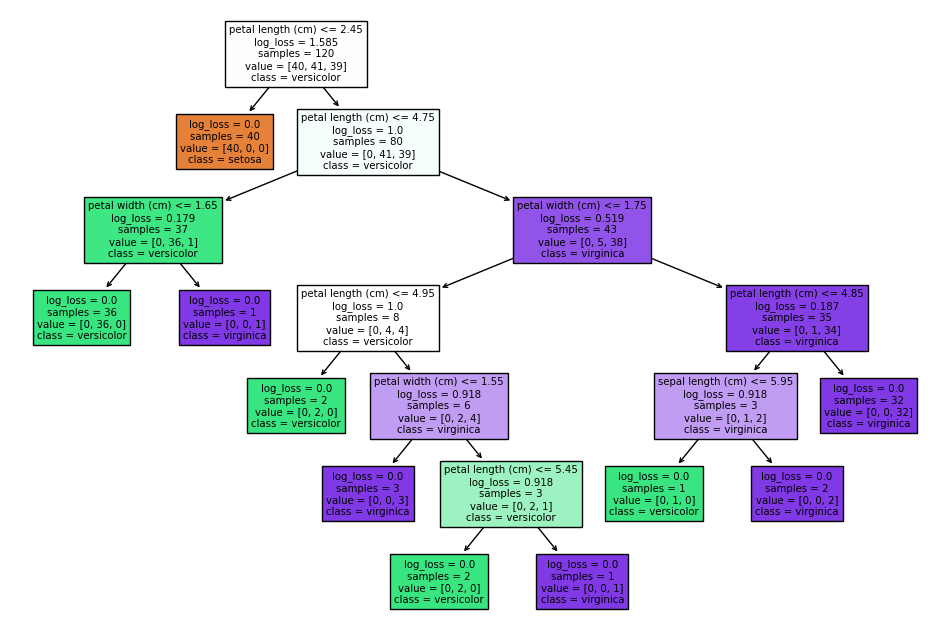

DecisionTreeClassifier(criterion='log_loss') 1.0


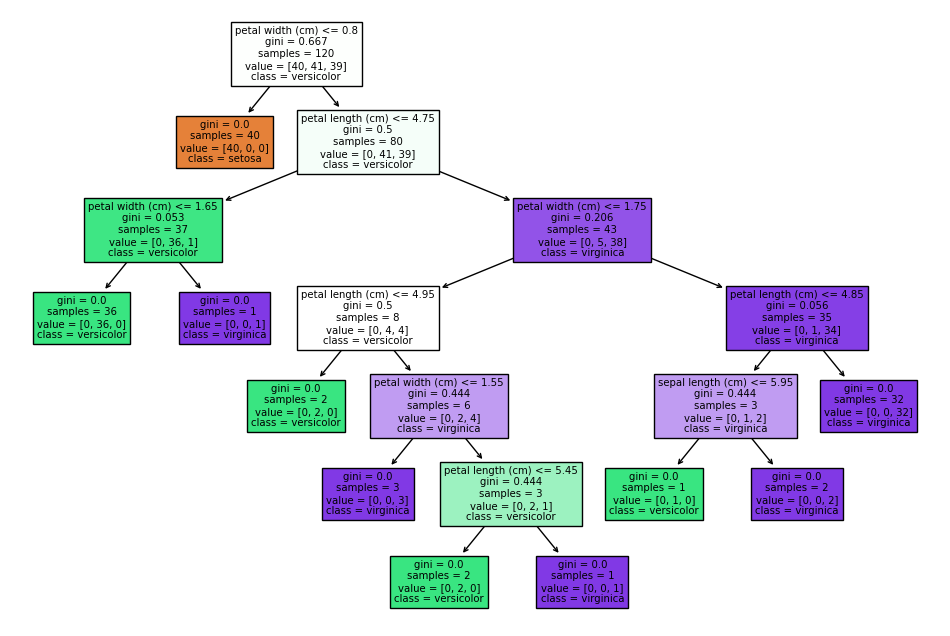

DecisionTreeClassifier() 1.0


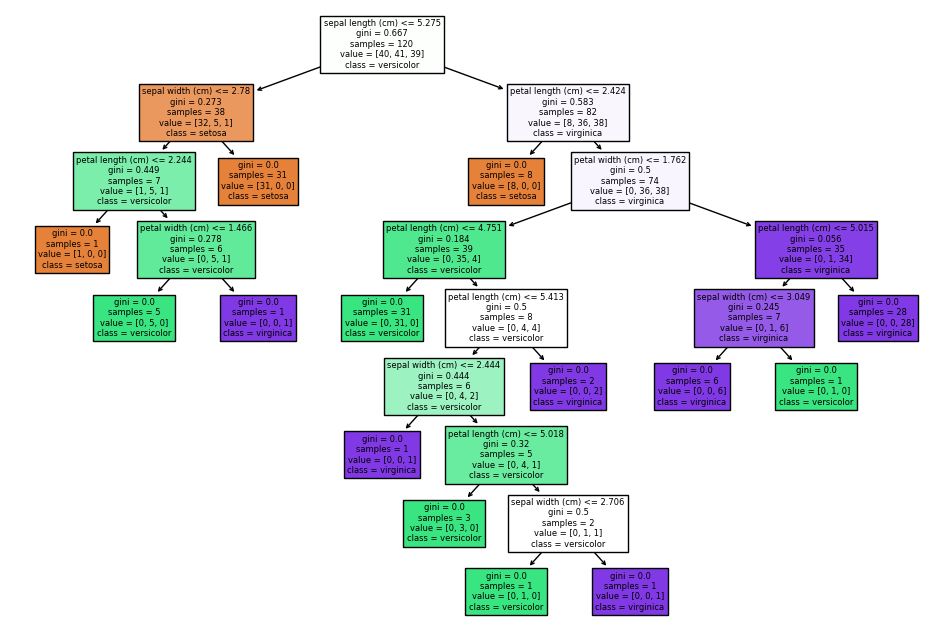

DecisionTreeClassifier(splitter='random') 1.0


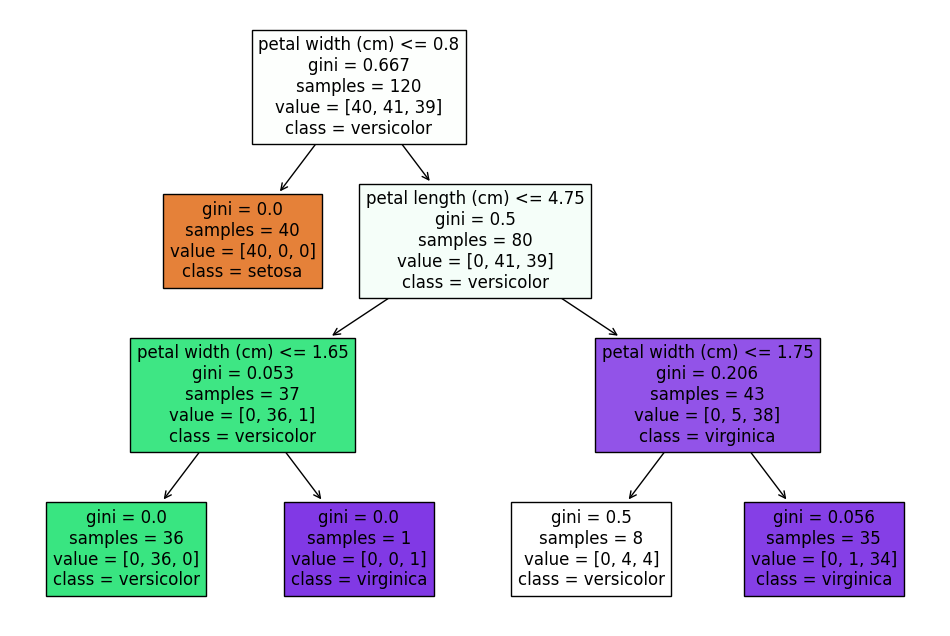

DecisionTreeClassifier(max_depth=3) 1.0


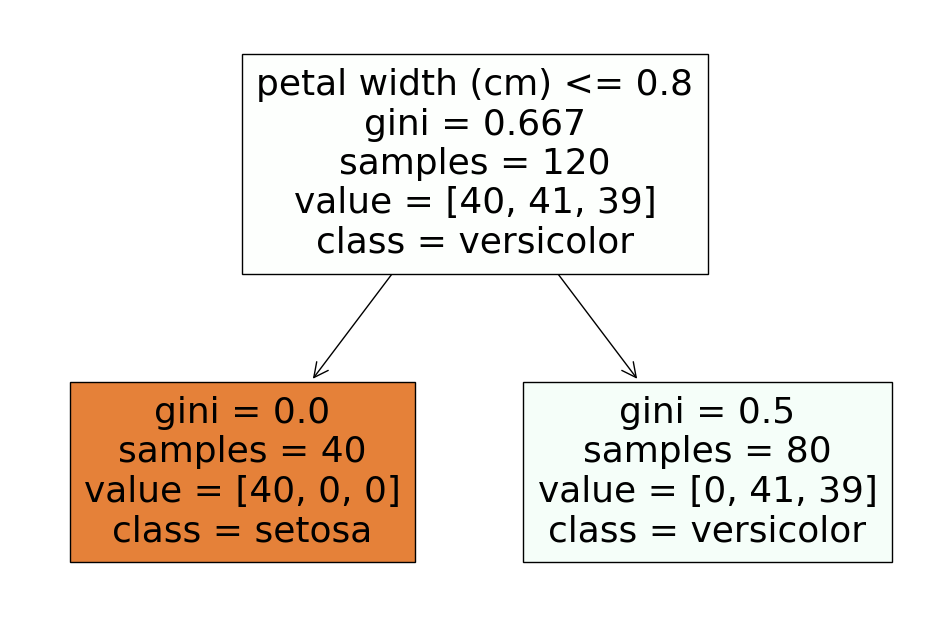

DecisionTreeClassifier(max_depth=1) 0.6333333333333333


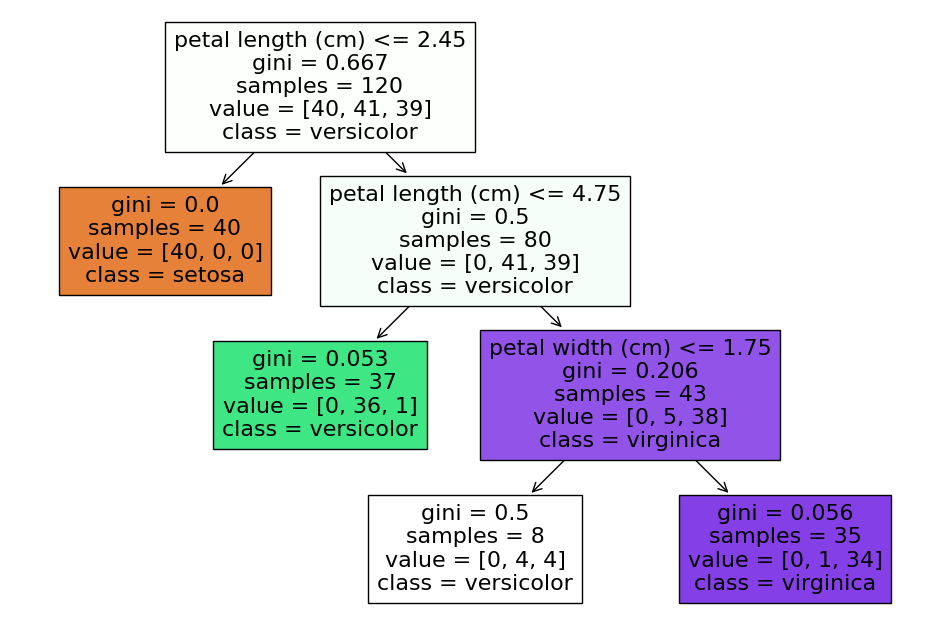

DecisionTreeClassifier(min_samples_split=40) 1.0


In [39]:
# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# gini = deafult
pipeline = [DecisionTreeClassifier(criterion = 'gini'),
            DecisionTreeClassifier(criterion = 'entropy'),
            DecisionTreeClassifier(criterion = 'log_loss'),
            DecisionTreeClassifier(splitter = 'best'), # default
            DecisionTreeClassifier(splitter = 'random'), # интересно
            DecisionTreeClassifier(max_depth = 3), # максимальное количество уровней (по вопросам)
            DecisionTreeClassifier(max_depth = 1),
             DecisionTreeClassifier(min_samples_split = 40), # когда задаем вопрос не может быть меньше 40 данных
            ]

for i in pipeline:
  i.fit(X_train, y_train)

  plt.figure(figsize=(12, 8))
  plot_tree(i, filled=True, feature_names=iris.feature_names,
  class_names=iris.target_names)
  plt.show()

  y_pred = i.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(i,accuracy)

## criterion
Параметр criterion определяет функцию, используемую для измерения качества разделения в дереве решений. Он поддерживает "gini" для примеси Джини, "entropy" для получения информации Шеннона и "log_loss" для логарифмической потери.
## splitter
Параметр splitter выбирает стратегию, используемую для выбора разделения на каждом узле. Он поддерживает "best" для выбора наилучшего разделения и "random" для выбора наилучшего случайного разделения.
## max_depth
Этот параметр задает максимальную глубину дерева решений. Если задано значение None, узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше указанного минимального количества выборок для разделения.
## min_samples_split
Он определяет минимальное количество выборок, необходимое для разделения внутреннего узла. Это может быть целое число или значение с плавающей точкой, где значение с плавающей точкой представляет долю от общего количества выборок.
## min_samples_leaf
Этот параметр задает минимальное количество выборок, необходимое для нахождения в конечном узле. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет по крайней мере указанное минимальное количество обучающих выборок в каждой из левой и правой ветвей.
## min_weight_fraction_leaf
Этот параметр устанавливает минимальную взвешенную долю от общей суммы весов, которая должна быть в конечном узле.
## max_features
Он определяет количество функций, которые следует учитывать при поиске наилучшего разделения. Это может быть целое число, число с плавающей точкой или конкретные значения, такие как "sqrt" или "log2"
## random_state
Этот параметр управляет случайностью оценки. Он используется для получения детерминированного поведения во время подгонки путем привязки к целому числу.
## max_leaf_nodes
Параметр max_leaf_nodes устанавливает максимальное количество конечных узлов в дереве.
## min_impurity_decrease
Этот параметр определяет пороговое значение для разделения узла на основе уменьшения вызываемой им примеси.

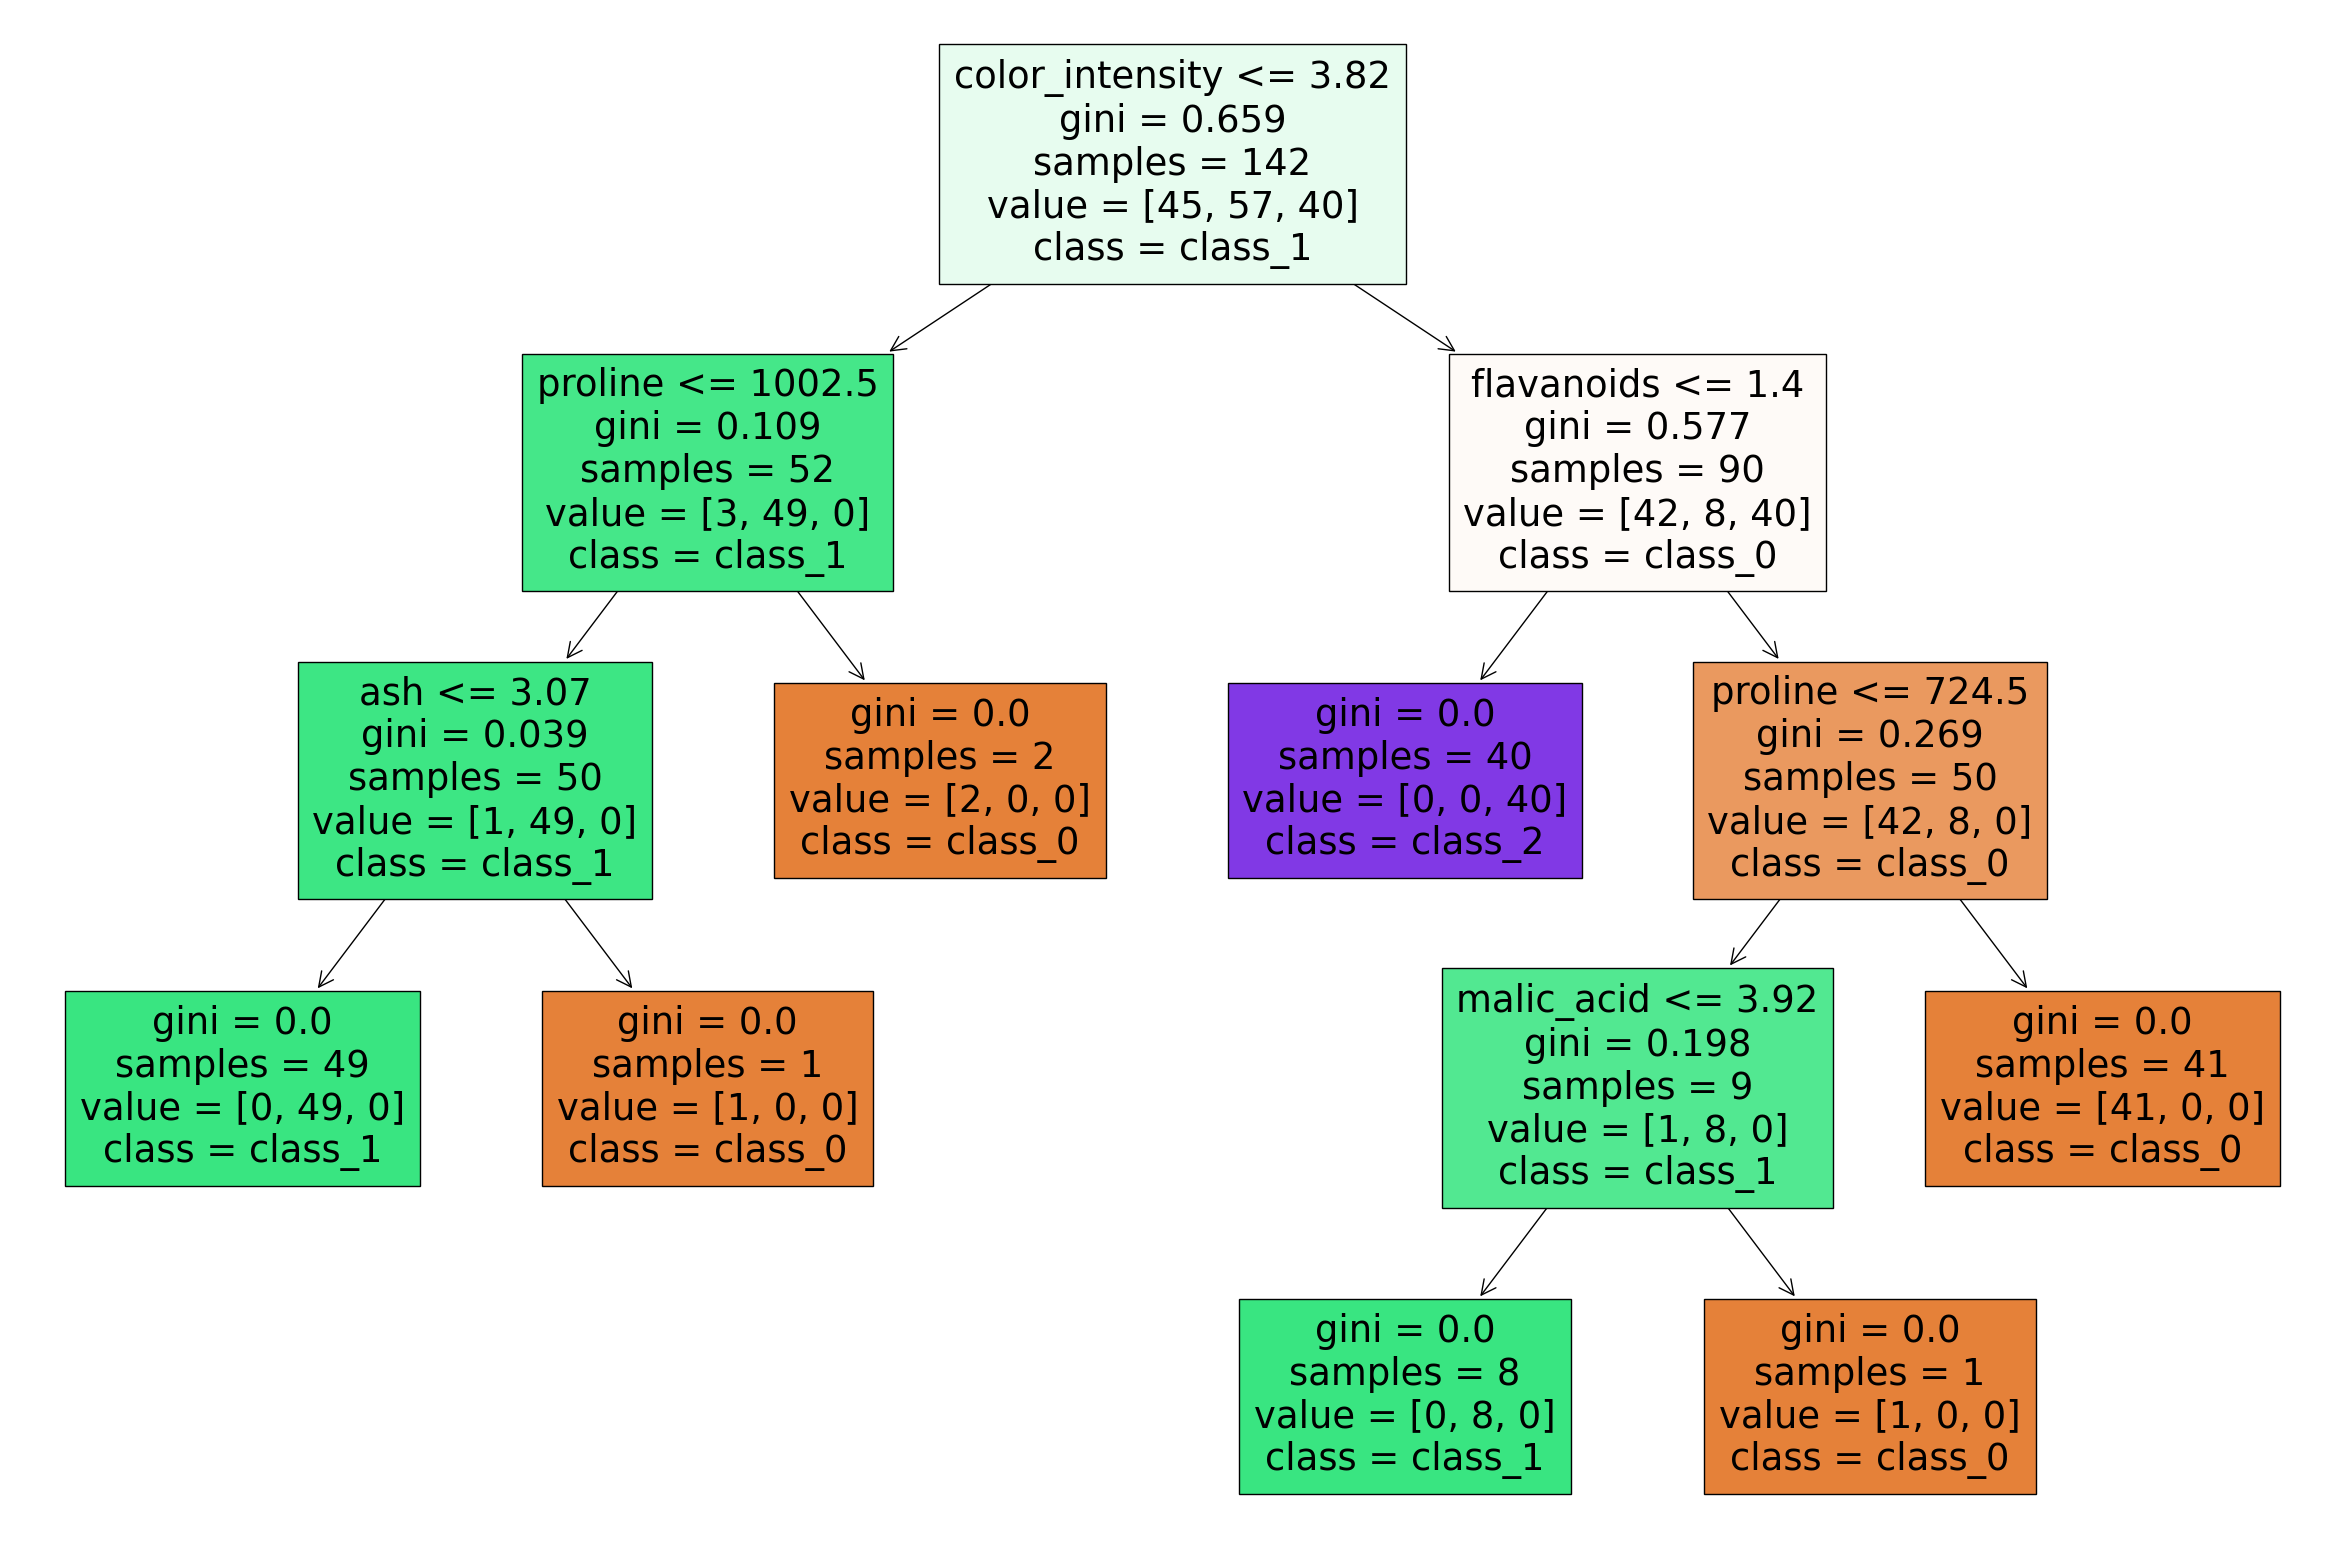

.. _wine_dataset:


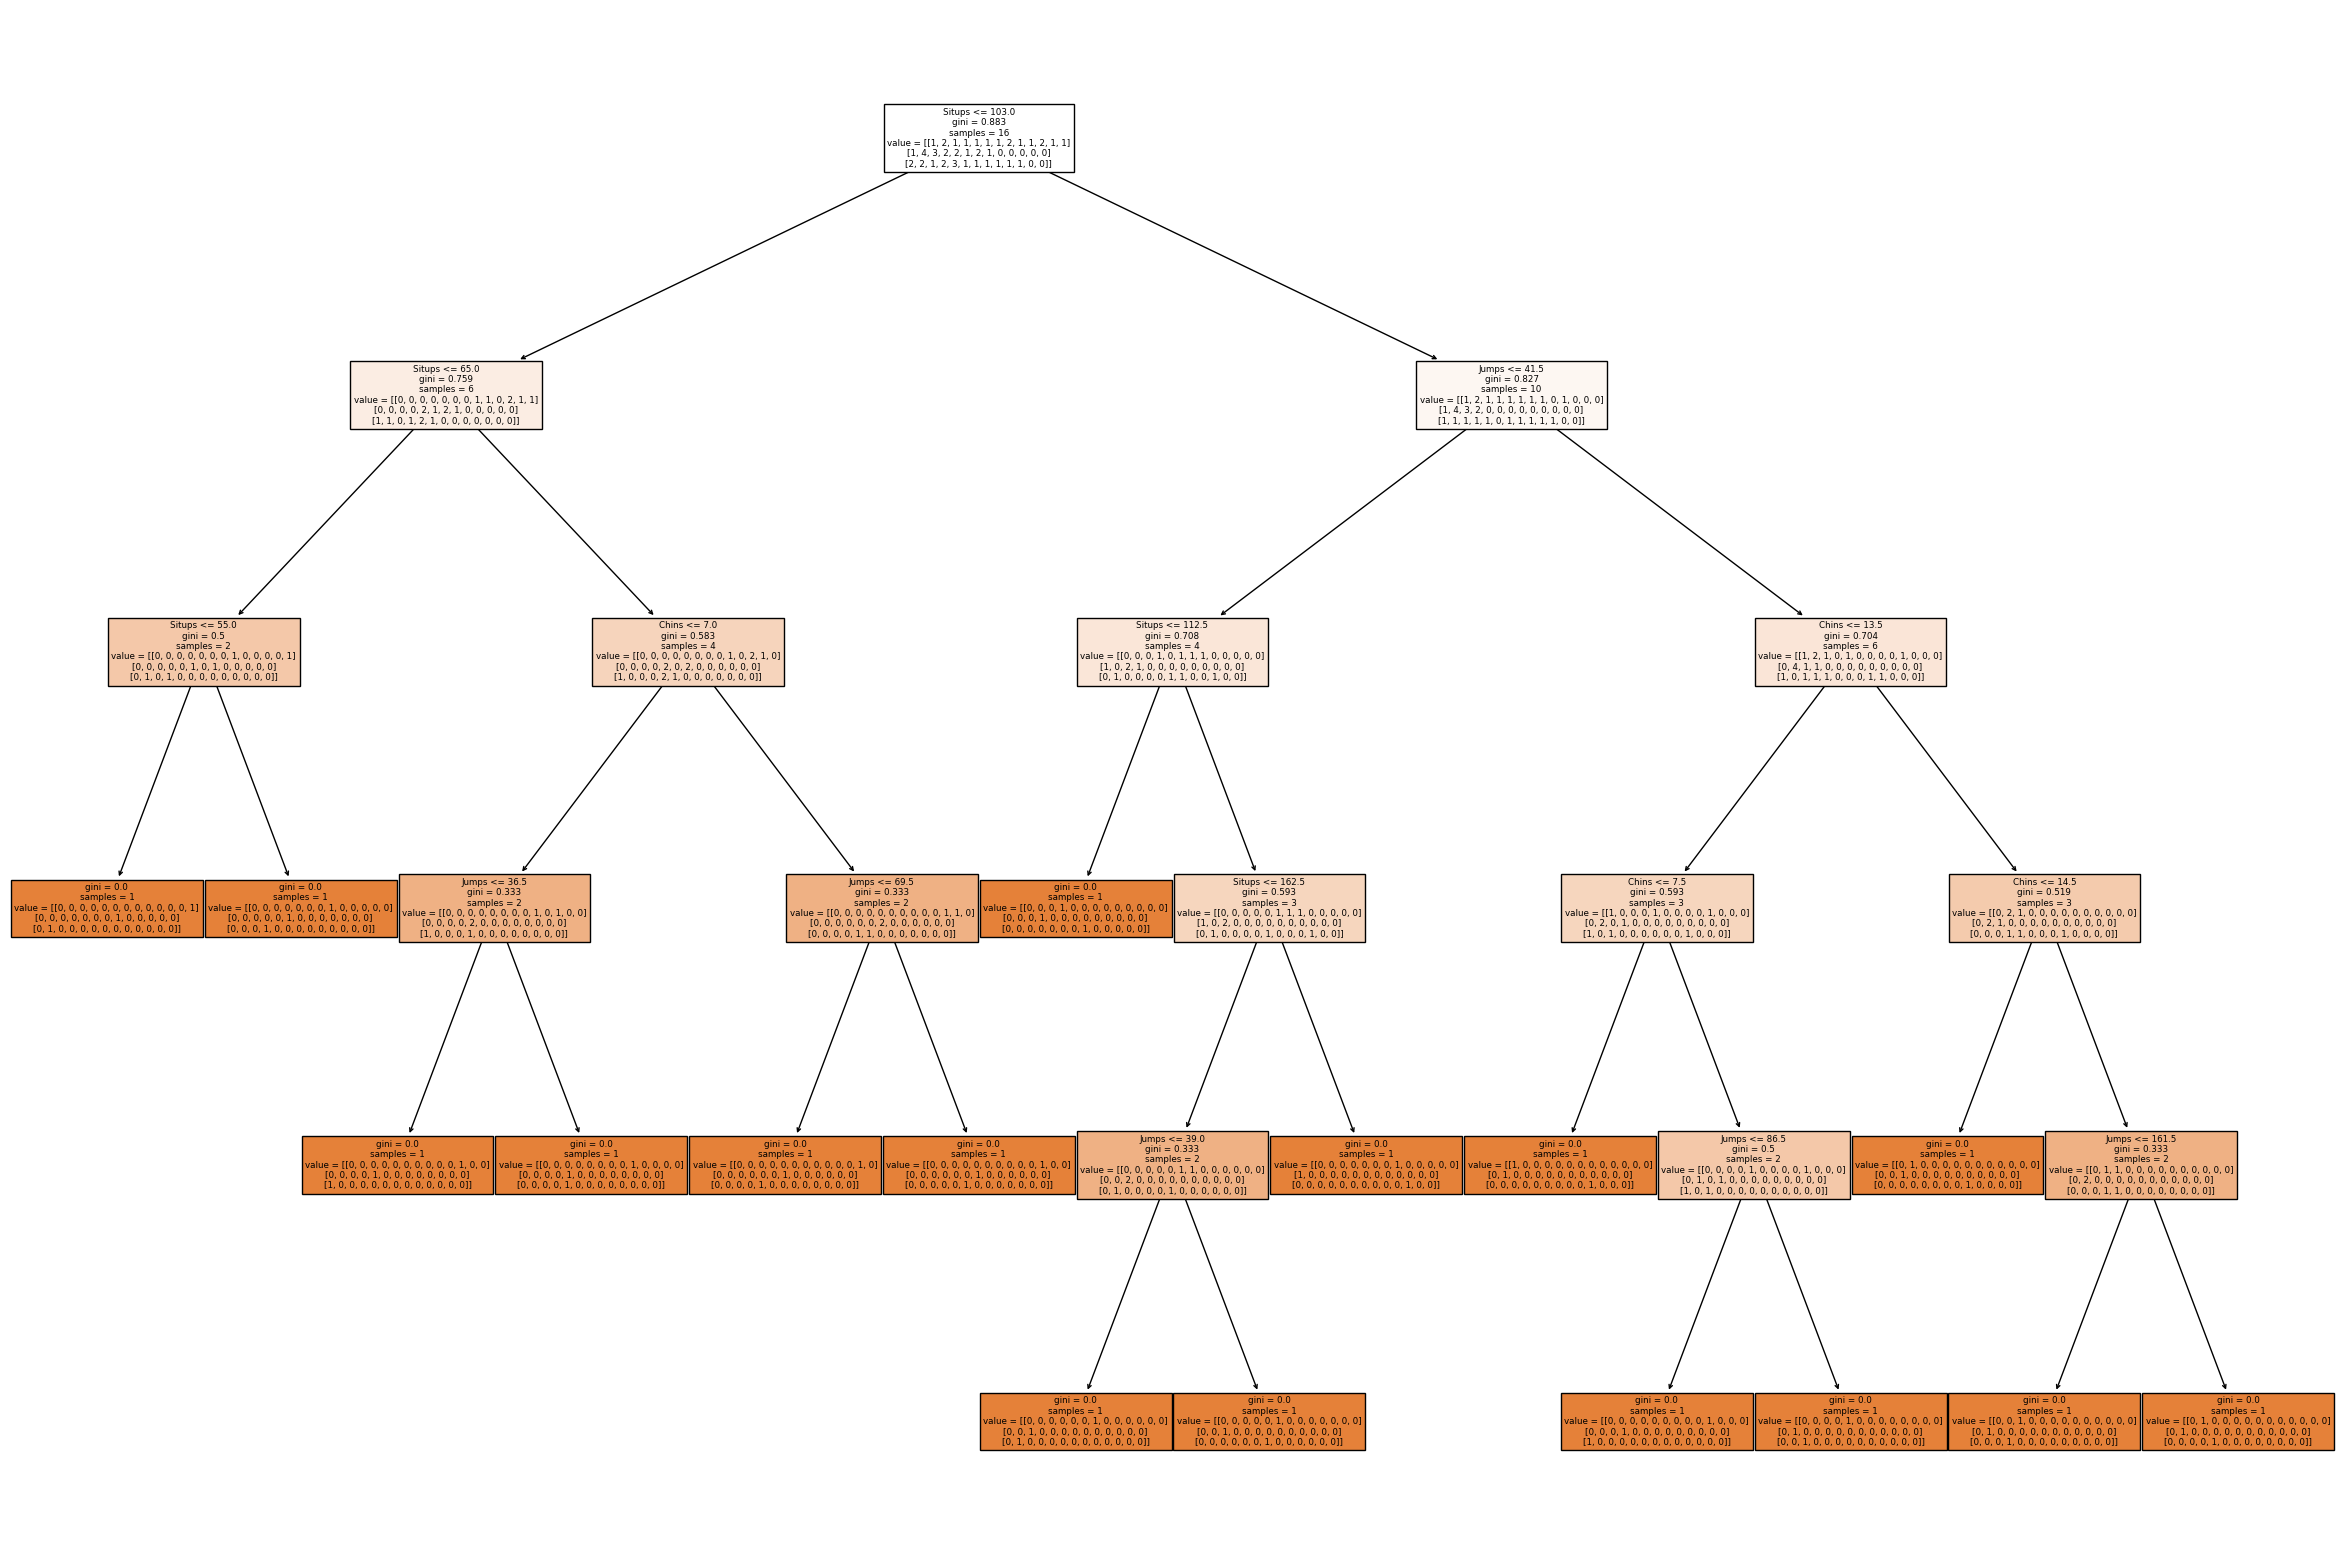

.. _linnerrud_dataset:


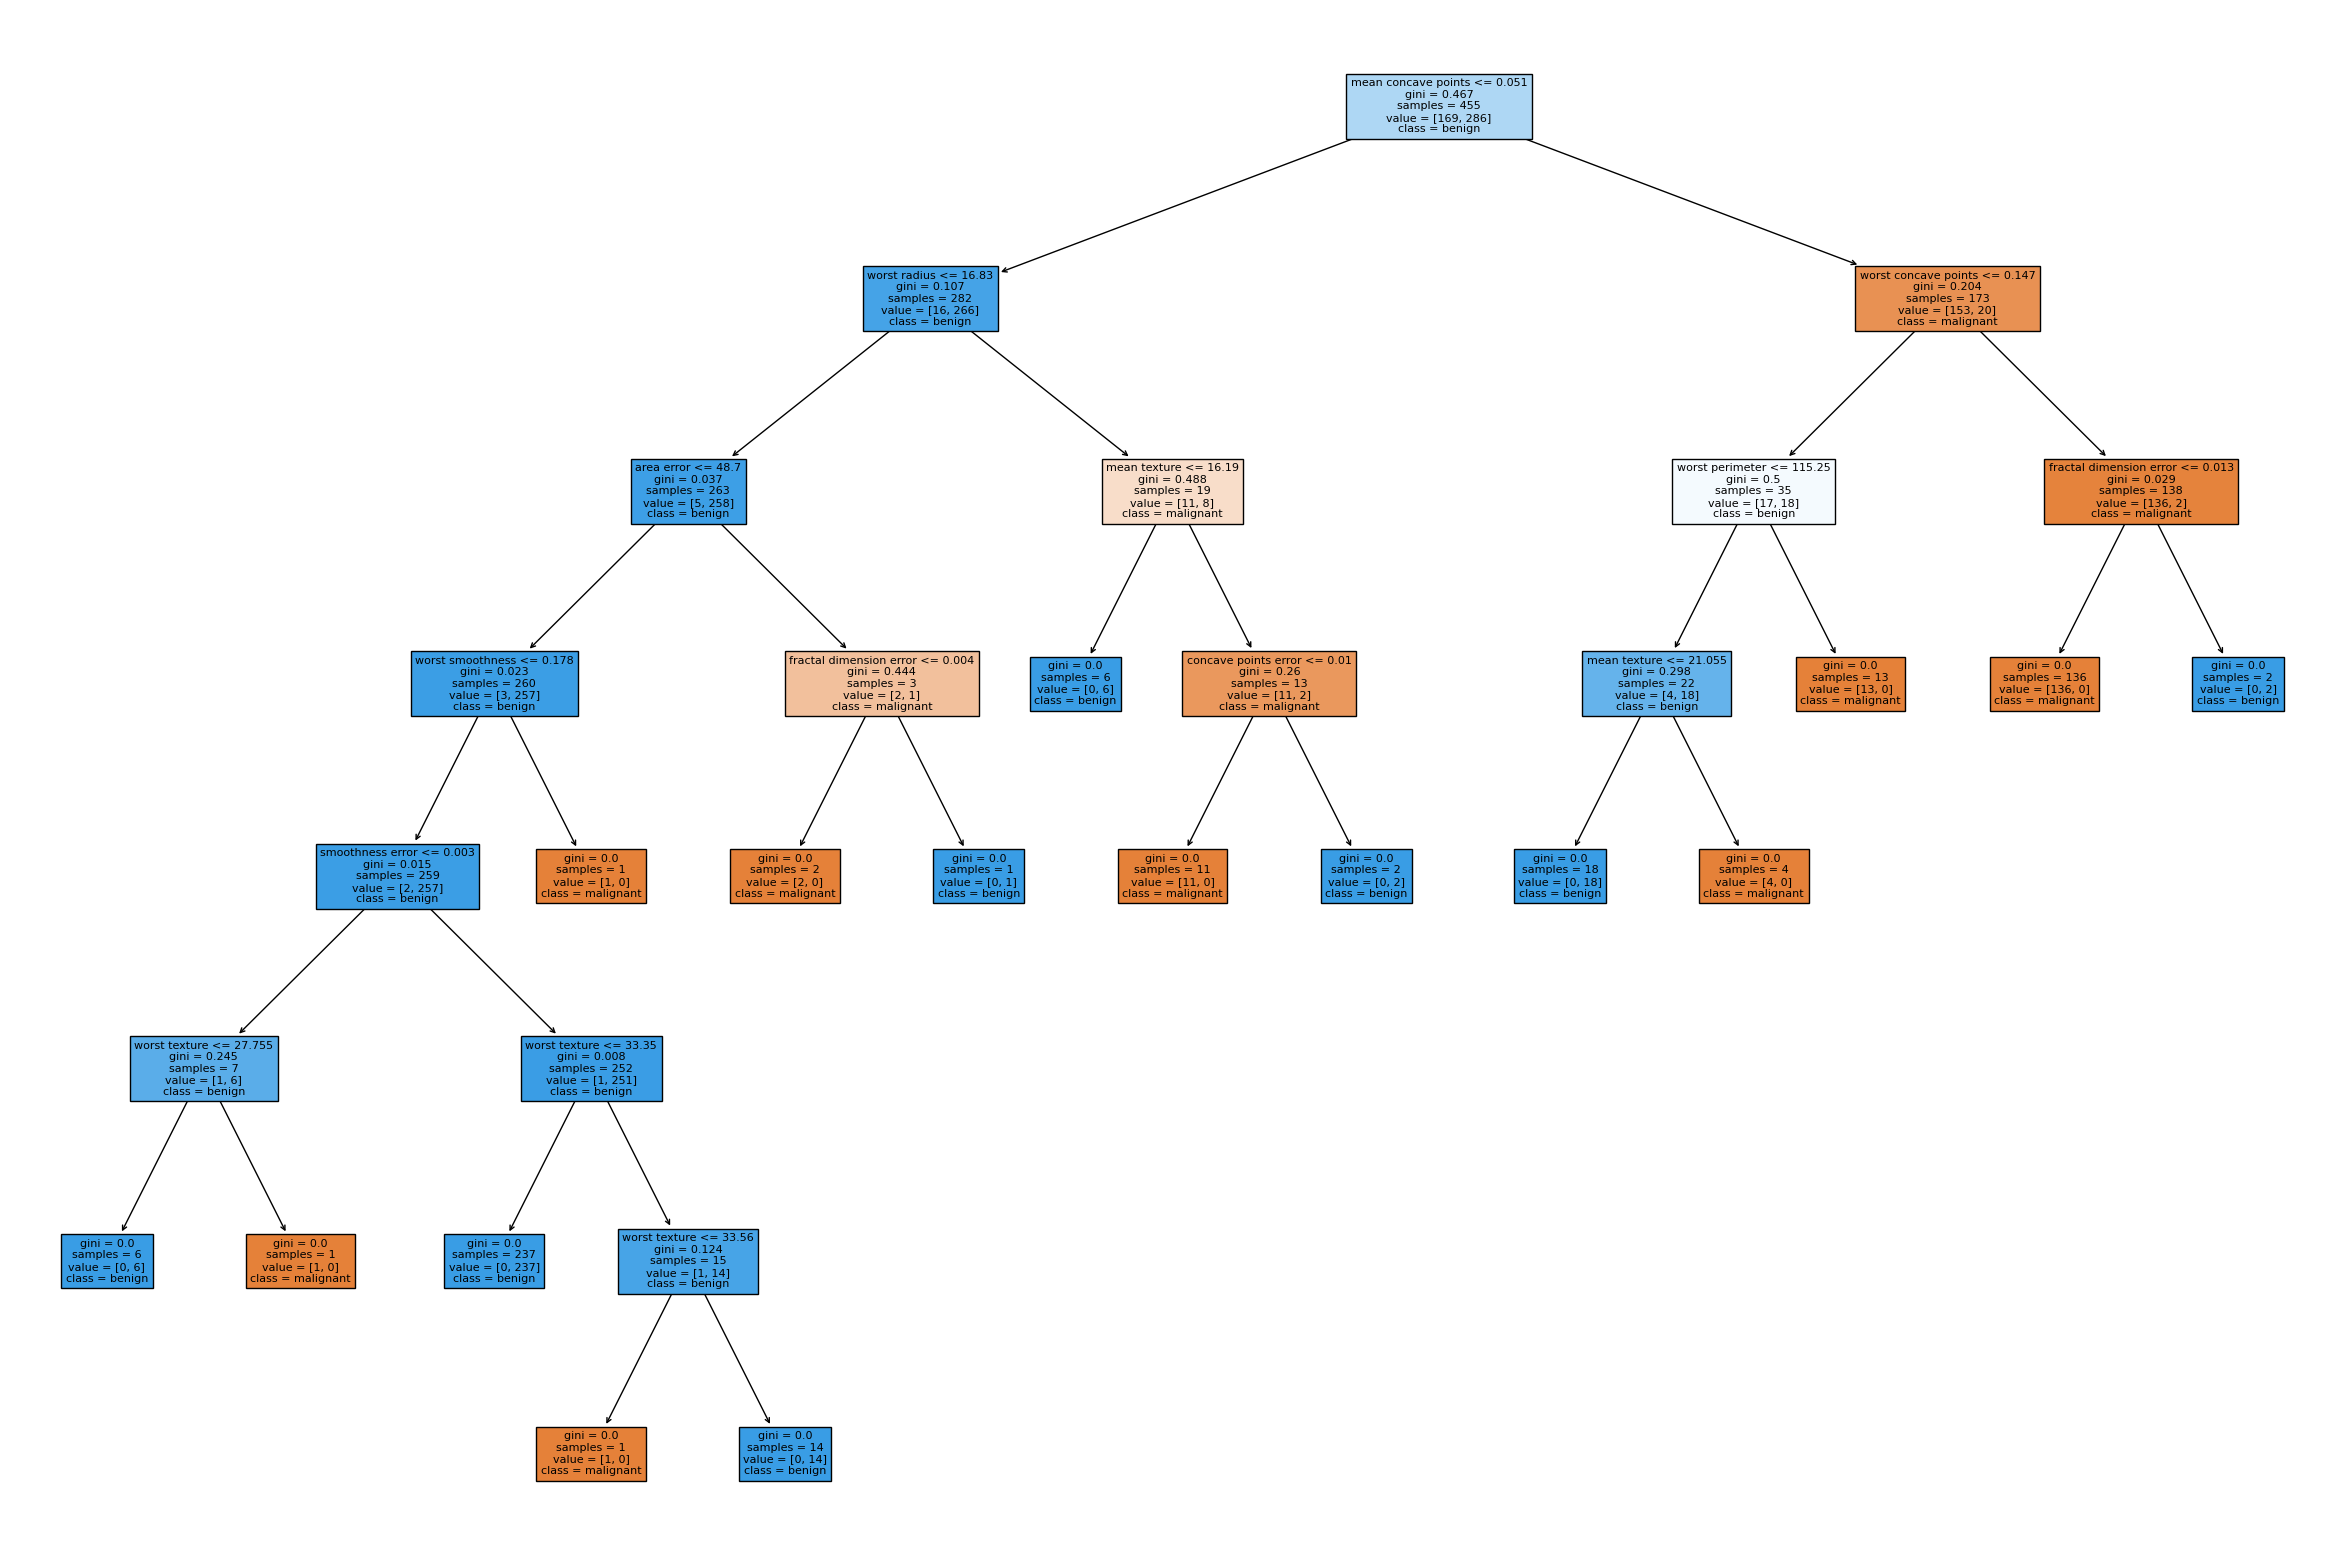

.. _breast_cancer_dataset:


In [79]:
from sklearn import datasets

datasets = [datasets.load_wine(), datasets.load_linnerud(), datasets.load_breast_cancer()]
for i in datasets:
    X = i.data
    y = i.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # gini = default
    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    plt.figure(figsize=(30, 20))
    plot_tree(clf, filled=True, feature_names=i.feature_names, class_names=i.target_names)
    plt.show()
    print(i.DESCR.split('\n', 1)[0])